# Inferential Statistics Assignment

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
# use credit card fraud dataset
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/credit_card_fraud.csv'

### Read the credit card fraud dataset into a Pandas data frame.

In [29]:
data = pd.read_csv(data_url)
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11961 entries, 0 to 11960
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction     11961 non-null  int64  
 1   type            11961 non-null  object 
 2   amount          11961 non-null  float64
 3   nameOrig        11961 non-null  object 
 4   oldbalanceOrg   11961 non-null  float64
 5   newbalanceOrig  11961 non-null  float64
 6   nameDest        11961 non-null  object 
 7   oldbalanceDest  11961 non-null  float64
 8   newbalanceDest  11961 non-null  float64
 9   isFraud         11961 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 934.6+ KB


### Generate a histogram that shows the data distribution of the "amount" field in the data.

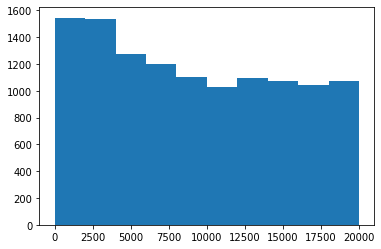

In [12]:
plt.hist(data['amount'])
plt.show()

### Randomly sample with replacement 1,000 records from the data set and calculate the mean of the "amount" field.

Run the cell a few times and see how the mean changes based on the records that are sampled.

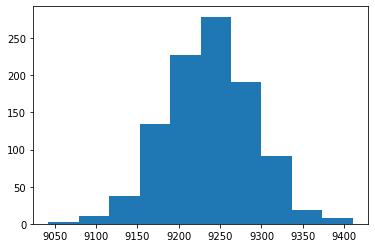

In [18]:
means = [data.sample(len(data), replace=True)['amount'].mean() for i in range(1000)]
plt.hist(means)
plt.show()

### Bootstrap a sampling distribution for the "amount" field means and generate a histogram showing the distribution of values.

- Generate one sampling distribution using 1,000 samples of size 1,000.
- Generate another sampling distribution using 5,000 samples that are each the size of the original data set.
- Note the differences between the two sampling distributions.

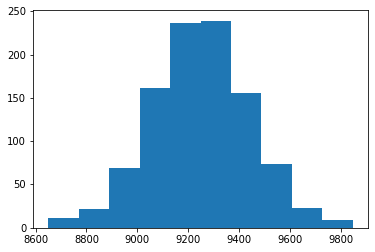

In [19]:
means = [data.sample(1000, replace=True)['amount'].mean() for i in range(1000)]
plt.hist(means)
plt.show()

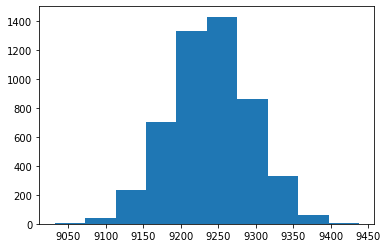

In [20]:
means = [data.sample(len(data), replace=True)['amount'].mean() for i in range(5000)]
plt.hist(means)
plt.show()

### Use Bayesian inference to construct a model that generates the posterior distribution showing the likely range of credit card fraud rates that may have resulted in the observed amount of fraud we see in the data. Hint: You'll want to look at the "isFraud" and "transaction" fields to help you.

In [32]:
data.loc[:, ['isFraud', 'transaction']].mean()

fraud = data.groupby('isFraud').agg({'transaction': 'count'}).reset_index()
fraud

,isFraud,transaction
0,0,11567
1,1,394


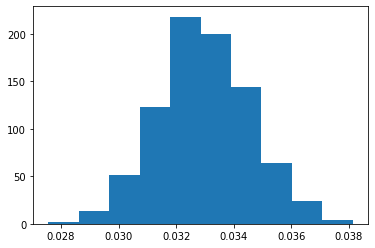

In [34]:
observed = fraud[fraud['isFraud']==1]['transaction'].values[0]
transactions = len(data)
observed_transaction = observed/transactions

results = []

for i in range(10000000):
  param = np.random.random()
  result = np.random.binomial(transactions, param)

  if result == observed:
    results.append(param)

plt.hist(results)
plt.show()

# Conclusion

Credit fraud occurs bewteen 3% and 3.6% per 11,961 transactions. The likelihood of someone experiencing credit fraud is pretty small, but will increase with the number of transactions made. 